In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sklearn.datasets

In [ ]:
lfw_people = sklearn.datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [ ]:
# Extract the images and labels
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names

In [ ]:
# Normalize the images by scaling them to [0, 1]
X = X.astype('float32') / 255.0

# Encode the labels (if necessary)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the images to have a channel dimension (if needed for your model)
image_width = 50  # Define image_width with the correct value
X_train = X_train.reshape(X_train.shape[0], image_width, 37, 1)  # Reshape to (num_samples, width, height, channels)
X_test = X_test.reshape(X_test.shape[0], image_width, 37, 1)  # Reshape to (num_samples, width, height, channels)

# Optionally, perform data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

In [ ]:
def build_deeper_face_recognition_model(input_shape=(50, 37, 1), num_classes=7): # Changed input_shape to match the data
    model = models.Sequential()

    # First convolutional block (increased depth)
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))  # padding='same'
    model.add(layers.BatchNormalization())  # Batch normalization
    model.add(layers.MaxPooling2D((2, 2)))

    # Second convolutional block
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))  # padding='same'
    model.add(layers.BatchNormalization())  # Batch normalization
    model.add(layers.MaxPooling2D((2, 2)))

    # Third convolutional block
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))  # padding='same'
    model.add(layers.BatchNormalization())  # Batch normalization
    model.add(layers.MaxPooling2D((2, 2)))

    # Fourth convolutional block - Reduced pooling size to avoid dimension becoming 0
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))  # padding='same'
    model.add(layers.BatchNormalization())  # Batch normalization
    # Adjust pooling size to avoid dimension becoming too small
    model.add(layers.MaxPooling2D((1, 1)))

    # Fifth convolutional block - Removed to reduce network depth
    # model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))  # padding='same'
    # model.add(layers.BatchNormalization())  # Batch normalization
    # model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and add fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.5))  # Regularization to avoid overfitting
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout again
    model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer for classification

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

model = build_deeper_face_recognition_model(input_shape=(50, 37, 1), num_classes=len(lfw_people.target_names)) # Call the function to create the model

In [ ]:
# Train the model
history = model.fit(train_generator, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 178ms/step - accuracy: 0.2677 - loss: 2.2857 - val_accuracy: 0.4612 - val_loss: 1.9078
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3542 - loss: 1.7882 - val_accuracy: 0.1822 - val_loss: 1.9122
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3695 - loss: 1.7658 - val_accuracy: 0.4612 - val_loss: 1.8444
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3941 - loss: 1.7063 - val_accuracy: 0.4612 - val_loss: 1.8293
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4024 - loss: 1.6806 - val_accuracy: 0.4612 - val_loss: 1.8038
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3970 - loss: 1.7201 - val_accuracy: 0.4612 - val_loss: 1.7957
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3911 - loss: 1.7179 - val_accuracy: 0.4612 - val_loss: 1.8308
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4042 - loss: 1.7134 - val_accuracy: 0.4612 -

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5007 - loss: 397.0739 
Test Accuracy: 0.4612


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


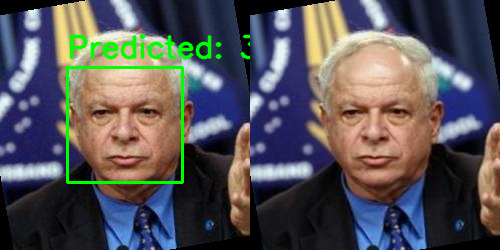

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow

# Load the Haar Cascade Classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def predict_face(model, img):
    # Resize image to the correct dimensions for prediction
    img_resized = cv2.resize(img, (37, 50))
    img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img_resized = np.expand_dims(img_resized, axis=0)  # Add batch dimension
    img_resized = np.expand_dims(img_resized, axis=-1)  # Add channel dimension
    img_resized = img_resized.astype('float32') / 255.0  # Normalize the image

    # Predict the label
    prediction = model.predict(img_resized)
    predicted_label = np.argmax(prediction)
    return predicted_label

# Example usage
img = cv2.imread("/content/face.jpg")

# Convert image to grayscale for face detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Loop through each face found and annotate it
for (x, y, w, h) in faces:
    # Draw a rectangle around the face
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Crop the face region to predict
    face = img[y:y+h, x:x+w]
    predicted_label = predict_face(model, face)

    # Annotate the label near the face
    font = cv2.FONT_HERSHEY_SIMPLEX
    label = f"Predicted: {predicted_label}"
    cv2.putText(img, label, (x, y - 10), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

# Concatenate the original image and annotated image horizontally
combined_img = np.hstack((img, cv2.imread("/content/face.jpg")))

# Show the combined image (original on the left, annotated on the right)
cv2_imshow(combined_img)  # Use cv2_imshow to display the image in Colab